# Série1 : Correction 
  ## Exercice 1:  

On a observé la taille de 15 femmes. Le boxplot et l'histogramme ci-dessous ont été construits avec ces données:

|||||||||||||||||
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
| **Taille** | 147 | 59 | 152 | 155 | 157 | 160 | 64 | 165 | 168 | 170 | 173 | 175 | 178 | 180 | 183 |

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

data = pd.DataFrame(np.array([147 , 59 , 152 , 155 , 157 , 160 , 64 , 165 , 168 , 170 , 173 , 175 , 178 , 180 , 183]).transpose(), 
                     columns=["Taille"])

1\) Calculer la moyenne et la médiane des tailles observées, puis faire un boxplot et un histogramme de ces tailles. Sur chacun de ces graphiques faire apparaître la moyenne et la médiane.

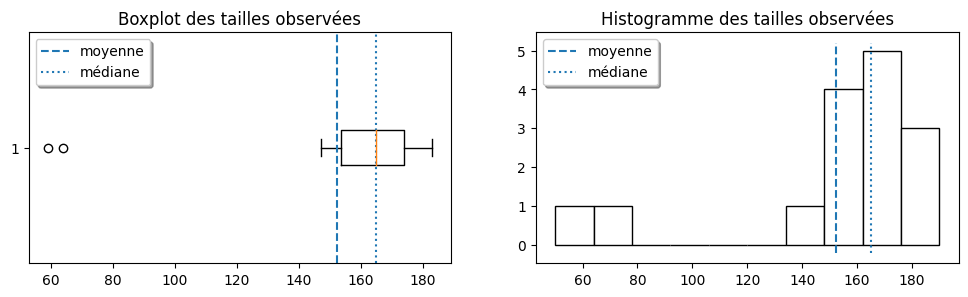

In [2]:
# Calculer la moyenne et la médiane des tailles observées
mean = data.Taille.mean()
median = data.Taille.median()

# Faire un boxplot et un histogramme
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (12,3))
ax1.boxplot(data.Taille, vert = 0)
ax1.vlines(mean,0.5,1.5,linestyles="dashed",label="moyenne")
ax1.vlines(median,0.5,1.5,linestyles="dotted",label="médiane")
ax1.legend(shadow=True, fancybox=True,loc="upper left")
ax1.set_title('Boxplot des tailles observées')
ax2.hist(data.Taille,range = (50,190), bins = 10, color = 'white',
            edgecolor = 'black')
ax2.vlines(mean,-0.2,5.2,linestyles="dashed",label="moyenne")
ax2.vlines(median,-0.2,5.2,linestyles="dotted",label="médiane")
ax2.legend(shadow=True, fancybox=True)
ax2.set_title('Histogramme des tailles observées')
plt.show()


2\) Entre la moyenne et la médiane, laquelle de ces deux caractéristiques représente le mieux la tendance centrale de la 
distribution des tailles? Justifiez votre réponse.

**Solution**: 
En traçant la moyenne ($ 152.4 $ cm) et la médiane ($ 163 $ cm) sur les graphiques, on voit que la moyenne est décalée vers les deux observations aberrantes. Ici on peut se permettre de dire que ces deux observations sont aberrantes, car il est rare de voir une femme ayant une taille inférieure à 80 cm. En fait, ces données sont les mêmes que celles de l'exercice 2 de la série 1, sauf qu'on a oublié de changer l'unité de mesure des deux premières observations; celles-ci sont donc présentées en pouces plutôt qu'en centimètres. Il y a donc deux erreurs de mesure dans les données (il est fréquent que les valeurs aberrantes soient dues à des erreurs). La tendance centrale des tailles est donc beaucoup mieux représentée par la médiane.  

3\) Si l'on considère seulement les tailles supérieures à $ 140 $ cm,  on obtient une moyenne de $ 166.4 $ cm et une médiane de $ 168 $ cm.  Commentez la phrase suivante : *“La médiane est plus robuste que la moyenne.”*

**Solution**: 
La moyenne est beaucoup plus influencée par un changement d'une petite partie des données que l'est la médiane.  Il faut cependant noter que les deux observations aberrantes sont vraiment différentes du reste des données ; un petit changement dans les données n'aurait pas eu un effet si grand sur la médiane.  

4\) Calculer l'écart-type et l'écart inter-quartile pour l'ensemble des tailles et pour les tailles supérieure à $140$ cm. Laquelle de ces deux caractéristiques vous semble la plus robuste?

**Solution**: 
L'écart inter-quartile. En général, si l'on suspecte la présence de valeurs aberrantes, on utilise la médiane
et l'écart inter-quartile, plutôt que la moyenne et l'écart-type pour caractériser
la distribution des données.


In [3]:
# Calcul de l'écart inter-quartiles

quantile = data.Taille.quantile((0.25,0.75), interpolation = "inverted_cdf").rename("Quantiles").to_frame()

EIQ = quantile["Quantiles"][0.75] - quantile["Quantiles"][0.25]

# Calcul de l'écart-type

std = data.Taille.std()

# Sélection des tailles supérieures à 140cm
data_140 = data[data.Taille > 140]

# Calcul de l'écart inter-quartile et de l'écart-type pour les tailles supérieures à 140cm

quantile_140 = data_140.Taille.quantile((0.25,0.75), interpolation = "inverted_cdf").rename("Quantiles").to_frame()

EIQ_140 = quantile_140["Quantiles"][0.75] - quantile_140["Quantiles"][0.25]

std_140 = data_140.Taille.std()

# Affichage des valeures obtenues
print(f"Sur l'ensemble des tailles observées, l'écart inter-quartile est EIQ = {EIQ}cm et l'écart-type est de {std:.2f}cm")
print(f"Sur l'ensemble des tailles supérieures à 140cm, l'écart inter-quartile est EIQ = {EIQ_140}cm et l'écart-type est de {std_140:.2f}cm")


Sur l'ensemble des tailles observées, l'écart inter-quartile est EIQ = 23cm et l'écart-type est de 38.41cm
Sur l'ensemble des tailles supérieures à 140cm, l'écart inter-quartile est EIQ = 18cm et l'écart-type est de 11.45cm


## Exercice 2:  

On a observé la taille et le poids de quelques femmes. Les résultats sont présentés dans le tableau suivant (la taille en centimètres, le poids en kilogrammes):
|||||||||||||||||
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
| **Taille** | 147 | 150 | 152 | 155 | 157 | 160 | 163 | 165 | 168 | 170 | 173 | 175 | 178 | 180 | 183 |
| **Poids** | 52 | 53 | 54 | 56 | 57 | 59 | 60 | 61 | 63 | 64 | 66 | 68 | 70 | 72 | 74 |

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
datas = pd.DataFrame(np.array([[147 , 150 , 152 , 155 , 157 , 160 , 163 , 165 , 168 , 170 , 173 , 175 , 178 , 180 , 183], 
                                [52 , 53 , 54 , 56 , 57 , 59 , 60 , 61 , 63 , 64 , 66 , 68 , 70 , 72 , 74]]).transpose(), 
                     columns=["Taille","Poids"])

1\) Est-ce que la taille est une variable quantitative, qualitative nominale ou qualitative ordinale ?

**Solution**: Quantitative.  
  
2\) Calculez la moyenne et l'écart-type des tailles observées.

In [5]:
# Calculer la moyenne des tailles
mean = datas.Taille.mean()

# Afficher cette moyenne
print("La moyenne des tailles observées est (en cm):\n",mean)

# Calculer l'écart-type des tailles
std = datas.Taille.std()

# Afficher cet écart-type
print("L'écart-type des tailles observées est (en cm):\n",std)


La moyenne des tailles observées est (en cm):
 165.06666666666666
L'écart-type des tailles observées est (en cm):
 11.423451233985205


3\) Pour les tailles observées, calculez le minimum, le maximum, la médiane, le quartile inférieur, le quartile supérieur et le quartile d'ordre 30%. Qu'est-ce que représentent ces quantités ?

**Solution**: 
L’idée des quantiles est qu’ils partagent les données en deux parties d’une manière spéciale. Par exemple, le quantile d’ordre 30%, q(30 %), est une valeur telle qu’environ 30% des données sont inférieures à cette valeur et environ 70% des données sont supérieures à cette valeur.


In [6]:
min = datas.Taille.min()
max = datas.Taille.max()
med = datas.Taille.median()

q_ = datas.Taille.quantile((0.25,0.3,0.75), interpolation = "inverted_cdf").rename("Quantiles").to_frame()
# Afficher les résultats caclulés  
print("Le minimum des tailles est: ",min)
print("Le minimum des tailles est: ",max)
print("La médiane des tailles est: ",med)
print("Les quantiles inférieur, d'ordre 30% et supérieure des tailles sont:\n",q_)


Le minimum des tailles est:  147
Le minimum des tailles est:  183
La médiane des tailles est:  165.0
Les quantiles inférieur, d'ordre 30% et supérieure des tailles sont:
       Quantiles
0.25        155
0.30        157
0.75        175


4\) Calculez l'écart inter-quartile des tailles observées

In [7]:
# Calcul de l'écart inter-quartile
EIQ = q_["Quantiles"][0.75] - q_["Quantiles"][0.25]
# Afficher ce résultat
print("L'écart inter-quartile des tailles est EIQ = " + str(EIQ) + " cm.")

L'écart inter-quartile des tailles est EIQ = 20 cm.


5\) Construisez le boxplot des tailles observées. Quels aspects des données cette représentation graphique nous permet-elle de visualiser?

**Solution**: 
Un boxplot montre d'une certaine manière "où sont les données". La région grise
contient 50 \% des données centrales. La région entre les limites de la "moustache" montre où
les données typiques sont attendues. Les données en dehors de cette région (s'il y en a)
pourraient être aberrantes. Les extrémités des moustaches du boxplot se calculent de la façon suivante :  

\begin{equation*} \min \{x_i : x_i \ge \hat{q}_x(25 \, \%) - C  \} = \min \{x_i : x_i \ge 155 - 30  \} = x_{(1)} = 147\end{equation*}  
$$ \max \{x_i : x_i \le \hat{q}_x(75 \, \%) + C  \} = \max \{x_i : x_i \le 175 + 30  \} = x_{(15)} = 183.$$


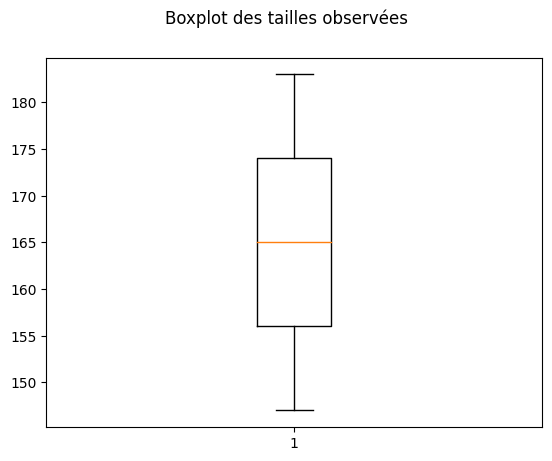

In [8]:
# Faire un boxplot des tailles observées
fig = plt.figure()
fig.suptitle("Boxplot des tailles observées")
plt.boxplot(datas.Taille)
plt.show()


6\) Divisez les tailles observées en 5 groupes :  
$ < 150 $, $ 150 - 159 $, $ 160 - 169 $, $ 170 - 179 $, $ > 179 $ cm.  
Construisez un histogramme en utilisant une ligne par groupe. Quels aspects des données cette représentation graphique nous permet-elle de visualiser?

**Solution**: 
Un histogramme est une représentation résumée de la distribution empirique des données, à changement d'échelle près (l'aire d'un histogramme n'est pas contrainte à valoir 1). De manière comparable à une représentation en "boîte à moustache", c'est une resumé d'une distribution univariée (à une dimension).


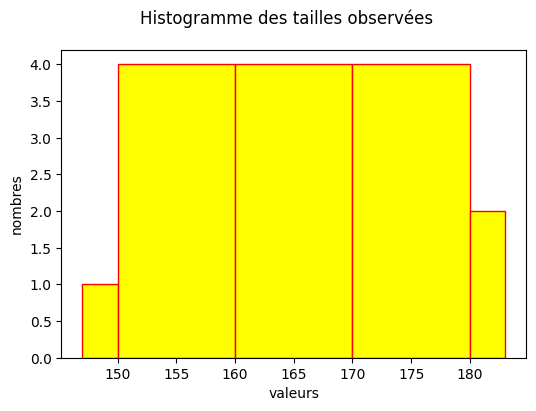

In [9]:
# Faire un histogramme avec les groupes mentionnés ci-dessus
fig = plt.figure(figsize = (6,4))
fig.suptitle("Histogramme des tailles observées")
plt.hist(datas.Taille,bins = [min,149.99,159.99,169.99,179.99,max],color = 'yellow',
            edgecolor = 'red')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.show()

7\) Pensez-vous qu'il existe une relation entre la taille et le poids des femmes ayant participé à l'enquête? Justifiez votre réponse à l'aide d'un graphique adéquat.

**Solution**: 
Le poids des femmes ayant participé à l'enquête augmente avec la taille. Les deux caractéristiques semblent donc liées. Dans quelques semaines nous allons voir comment faire un test formel pour cela.


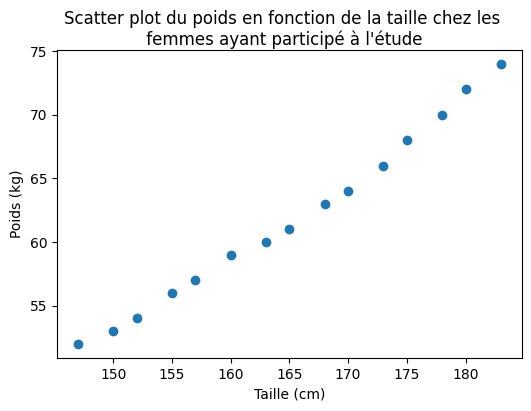

In [10]:
# Faire un graphique permettant de mettre en évidence la relation entre la taille 
# et le poids des femmes ayant participer à l'enquête
fig = plt.figure(figsize = (6,4))
fig.suptitle("Scatter plot du poids en fonction de la taille chez les\n femmes ayant participé à l'étude")
plt.scatter(x = datas.Taille, y = datas.Poids)
plt.xlabel('Taille (cm)')
plt.ylabel('Poids (kg)')
plt.show()

## Exercice 3: 

On a observé la couleur des cheveux et des yeux de certains étudiants de l’Université du Delaware.
Les résultats sont présentés dans le tableau suivant :

| Cheveux / Yeux  | Brun | Bleu       | "Hazel" | Vert |
| :---------------: |:---------------:|:---------------:| :---------------:| :---------------: |
| Noir  | 68 | 20 | 15 | 5 |
| Brun  | 119 | 84 | 54 | 29 |
| Roux  | 26 | 17 | 14 | 14 |
| Blond | 7 | 94 | 10 | 16|

In [11]:
import pandas as pd 
import numpy as np
data = pd.DataFrame(np.array([[68, 20, 15, 5], [119, 84, 54, 29], [26, 17, 14,14 ],[7,94,10,16 ]]), 
                     columns=["Brun","Bleu", "Hazel", "Vert"],index=["Noir","Brun","Roux","Blond"])


1\) Combien d'étudiants ont participé à cette enquête ?

In [12]:
# Calculer et affficher le nombre total d'étudiants qui ont participé à cette enquête
n_student = data.sum().sum()
print(n_student)

592


2\) Est-ce que la couleur des cheveux est une variable quantitative, qualitative nominale ou qualitative
ordinale ?

**Solution**:
Dans cette étude,les variables sont qualitatives nominales. Cependant, on pourrait faire une étude plus avancée qui étudierait les couleurs de cheveux et d’yeux comme un continuum. On pourrait donc faire une autre étude où ces mêmes variables sont continues.  
  
3\) Résumez ce que vous pouvez dire sur la couleur des cheveux des étudiants à l’aide de quelques chiffres et graphiques adéquats.

**Solution**:
La plupart des étudiants ayant participé à l’enquête ont les cheveux bruns. La couleur la moins
fréquente est roux. Les fréquences absolues et relatives sont données dans la DataFrame ```résumé```dans la cellule suivante. De plus, on peut représenter les résultats à l’aide des graphiques présent la cellules suivante. Pour une fois, le choix du "camembert" peut se défendre, car il permet de voir clairement que
la moitié de la population est brune.  
    


       Fréquence absolue  Fréquence relative
Noir                 108            0.182432
Brun                 286            0.483108
Roux                  71            0.119932
Blond                127            0.214527


<BarContainer object of 4 artists>

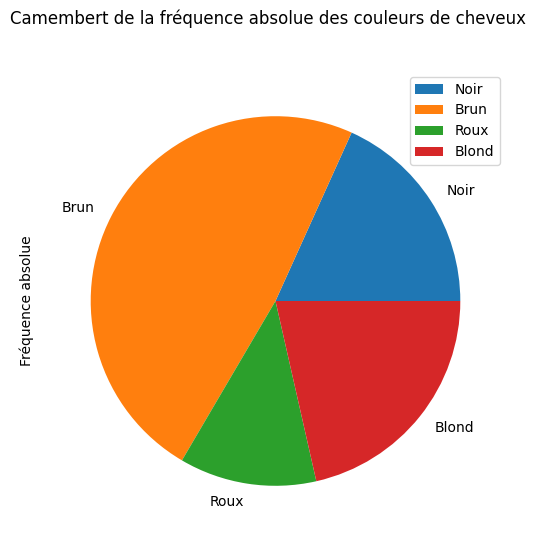

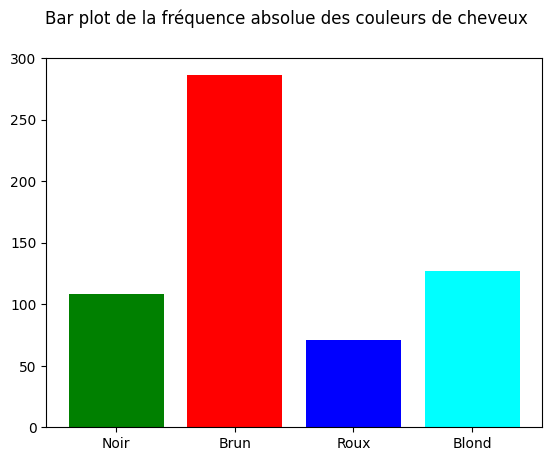

In [13]:
import matplotlib.pyplot as plt

# Calculer la fréquence absolue et relative des cheveux des étudiants
d = {"Fréquence absolue": data.sum(axis = 1), "Fréquence relative": data.sum(axis = 1)/n_student}
résumé = pd.DataFrame(data = d)

print(résumé)



# Faire un plot en camembert de la fréquence absolue des couleurs des cheveux
fig, ax = plt.subplots()
fig.suptitle("Camembert de la fréquence absolue des couleurs de cheveux")
résumé.plot.pie(y="Fréquence absolue",figsize=(6,6),ax=ax)



# Faire un bar plot de la fréquence absolue des couleurs de cheveux
fig, ax = plt.subplots()
fig.suptitle("Bar plot de la fréquence absolue des couleurs de cheveux")
plt.bar(x = résumé.index,height = résumé["Fréquence absolue"],color=["green","red","b","cyan"],)


4\) Pensez-vous que la couleur des cheveux et la couleur des yeux des étudiants ayant participé à l’enquête sont liées ? Justifiez votre réponse.


**Solution**:  
Examinons par exemple, les fréquences relatives des couleurs des yeux parmi les étudiants avec les cheveux
noirs et parmi les étudiants avec les cheveux blonds dans la table issue de la cellule de code suivante. Puisque les fréquences relatives semblent différentes entre les deux groupes (cheveux noir vs
cheveux blonds), il semble que la couleur des yeux et la couleur des cheveux des étudiants ayant
participé à l’enquête sont liées. Dans quelques semaines nous allons voir comment faire un test
formel pour cela. 

In [14]:
########### Solution Python: ##########


fréquences_relatives = data.div(data.sum(axis = 1),axis = 0)
print(fréquences_relatives)

           Brun      Bleu     Hazel      Vert
Noir   0.629630  0.185185  0.138889  0.046296
Brun   0.416084  0.293706  0.188811  0.101399
Roux   0.366197  0.239437  0.197183  0.197183
Blond  0.055118  0.740157  0.078740  0.125984


## Exercice 4:  

On a observé les précipitations journalières 01.01.2000 - 10.07.2022 de la station météo Suisse de Changrins.

In [18]:
import pandas as pd
data = pd.read_csv('Precipitations_journalieres_Changins.csv',sep=',',names= ["Date","Précipitation"])

1\) Calculer la moyenne et la médiane de ces données. Puis, faire un boxplot et un histogramme de ces données et faire apparaitre la moyenne et la médiane sur chacunes de ces figures.

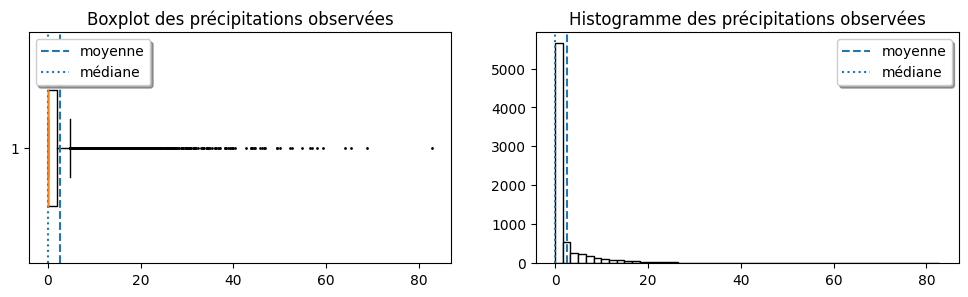

In [19]:
import matplotlib.pyplot as plt
# Calculer la moyenne et la médiane des tailles observées
mean = data.Précipitation.mean()
median = data.Précipitation.median()

# Faire un boxplot et un histogramme
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (12,3))
ax1.boxplot(data.Précipitation,vert=0,widths=0.5, 
                  flierprops={'marker': 'o', 'markersize': 1, 'markerfacecolor': 'white'})
ax1.vlines(mean,0.5,1.5,linestyles="dashed",label="moyenne")
ax1.vlines(median,0.5,1.5,linestyles="dotted",label="médiane")
ax1.legend(shadow=True, fancybox=True,loc="upper left")
ax1.set_title('Boxplot des précipitations observées')
ax2.hist(data.Précipitation, bins = 50, color = 'white',
            edgecolor = 'black')
ax2.vlines(mean,0, 1, transform=ax2.get_xaxis_transform(),linestyles="dashed",label="moyenne")
ax2.vlines(median,0, 1, transform=ax2.get_xaxis_transform(),linestyles="dotted",label="médiane")
ax2.legend(shadow=True, fancybox=True)
ax2.set_title('Histogramme des précipitations observées')
plt.show()


2\) Laquelle de ces deux caractéristiques représente le mieux la tendance centrale de la 
distribution? Justifiez votre réponse.

**Solution**: 
En traçant la moyenne ($ 2.61 $ mm) et la médiane ($ 0.0 $ mm)
sur les graphiques, on voit que la moyenne est décalée vers les observations
extrêmes, qui sont ici assez nombreuses. Par contre, dans ce cas-ci, il ne s'agit pas d'une erreur dans les données, il est tout à fait normal d'observer d'importantes averses au cours d'une année. Même si la tendance centrale des pluies journalières typiques est généralement mieux représentée par la médiane, la différence entre la moyenne et la médiane attire notre attention sur le fait qu'il y a plus de la moitié des jours où il ne pleut pas. En regardant l'histogramme, on peut aussi constater que les données à droite de la médiane sont plus dispersées que les données à gauche. La quantité d'information fournit par ces deux valeurs est donc limitée. La quantité de précipitation journalière  dépendant fortement de la saison ou encore du mois, il serait plus approprié d'étudier ces données sur des périodes différentes. Les tendances centrales de chaque période serait alors mieux représeneter par la médiane serait moins influencé par de potentielles observations extrêmes.
